In [1]:
import os, glob, sys
import pygmt
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from seisgo import noise
import seisgo.utils as utils
import seisgo.downloaders as dld
import seisgo.plotting as sp

np.set_printoptions(threshold=sys.maxsize)

## 1. Set Direc

In [2]:
rootpath = "/home/ckupres/volcanodvv" # roothpath for the project
maindirec  = '/home/ckupres/volcanodvv/data_greatsitkin' #main project folder
direc  = os.path.join(rootpath,'data_greatsitkin/MERGED_PAIRS_all_sta')

## 2. Download EQ Data

In [3]:
sta_list = ['AV.GSCK','AV.GSMY','AV.GSSP','AV.GSTD','AV.GSTR']

data0 = []
sta_locs0 = []

for sta in sta_list:
    print(sta)
    source = sta
    receiver = source
    cc_comp = 'EZ'

    #file handling#
    key=source+'_'+receiver
    ccfile=sorted(glob.glob(os.path.join(direc,source,'*'+receiver+'*.h5')))[0]
    corrdata=noise.extract_corrdata(ccfile,pair=source+'_'+receiver,comp=cc_comp)
    cdata0=corrdata[key][cc_comp]
#     sdate="2019-07-01"
    sdate="2021-01-01"
#     edate="2023-01-01"
    edate="2023-01-01"
    cdata0.subset(starttime=sdate,endtime=edate, overwrite = True)    


    #Downloading Seismicity
    offset = 0.07
    minlat= np.mean(cdata0.lat)-offset
    maxlat= np.mean(cdata0.lat)+offset
    minlon= np.mean(cdata0.lon)-offset
    maxlon= np.mean(cdata0.lon)+offset
    minmag = 0
    maxmag = 9
    magstep = 1.0 
    catalog = dld.get_events(sdate,edate,minlon,maxlon,minlat,maxlat,minmag,maxmag,magstep)
    cat=pd.DataFrame(utils.qml2list(catalog))
    
    yrange = [-1.5,12]
    ymin,ymax=yrange
    cat2=cat[(cat.depth>=yrange[0]) & (cat.depth<=yrange[1])]
    
    data0.append(cat2)
    
    #Station coords
    sta_coords = [np.mean(cdata0.lat), np.mean(cdata0.lon)]
    sta_locs0.append(sta_coords)

sta_locs = np.array(sta_locs0)
data = pd.concat(data0)

AV.GSCK
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=51.940799407958984&maxlatitude=52.080799407958985&minlongitude=-176.23400146484374&maxlongitude=-176.09400146484376&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=51.940799407958984&maxlatitude=52.080799407958985&minlongitude=-176.23400146484374&maxlongitude=-176.09400146484376&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=6.0001&maxmagnitude=7.0&minlatitude=51.940799407958984&maxlatitude=52.080799407958985&minlongitude=-176.23400146484374&maxlongitude=-176.09400146484376&mindepth=-100&maxdepth=1000
204 H

/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:120: UserWarning: Setting attribute "preferred_mag" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/core/util/attribdict.py:120: UserWarning: Setting attribute "preferred_mag_type" which is not a default attribute ("event_descriptions", "comments", "picks", "amplitudes", "focal_mechanisms", "origins", "magnitudes", "station_magnitudes", "resource_id", "event_type", "event_type_certainty", "creation_info", "preferred_origin_id", "preferred_magnitude_id", "preferred_focal_mechanism_id").
  warnings.warn(msg)
/depot/xtyang/apps/seisgo/lib/python3.7/site-packages/obspy/c

204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=4.0001&maxmagnitude=5.0&minlatitude=51.97209899902344&maxlatitude=52.11209899902344&minlongitude=-176.1283038330078&maxlongitude=-175.98830383300782&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=5.0001&maxmagnitude=6.0&minlatitude=51.97209899902344&maxlatitude=52.11209899902344&minlongitude=-176.1283038330078&maxlongitude=-175.98830383300782&mindepth=-100&maxdepth=1000
204 HTTP Error: No Content for url: https://earthquake.usgs.gov/fdsnws/event/1/query?format=xml&starttime=2021-01-01&endtime=2023-01-01&minmagnitude=6.0001&maxmagnitude=7.0&minlatitude=51.97209899902344&maxlatitude=52.11209899902344&minlongitude=-176.1283038330078&maxlongitude=-175.98830383300782&mindepth=-100&maxdepth=1000
204 HTTP Error: No Con

In [6]:
data

,number,latitude,longitude,depth,datetime,magnitude,magnitude_type,author,event_id,origin_id,focal_mechanism,source_duration,flynn_region
2,3,52.075167,-176.141167,9.81,2022-07-19T03:22:33.530000Z,0.27,ml,None,20220719_032233.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.008]",NAN
3,4,52.051333,-176.128833,5.03,2022-07-11T18:10:40.050000Z,0.00,ml,None,20220711_181040.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.006]",NAN
4,5,52.072500,-176.161667,10.25,2022-06-29T12:38:45.810000Z,0.17,ml,None,20220629_123845.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.006]",NAN
7,8,52.080000,-176.146833,11.72,2022-06-07T19:47:12.170000Z,0.45,ml,None,20220607_194712.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.01]",NAN
9,10,52.071833,-176.123167,5.19,2021-09-13T05:07:29.140000Z,0.29,ml,None,20210913_050729.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.008]",NAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,52.090500,-176.128833,2.98,2021-05-25T18:06:28.680000Z,1.42,ml,None,20210525_180628.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.028]",NAN
231,232,52.061167,-176.123500,6.54,2021-04-28T09:00:19.610000Z,1.21,ml,None,20210428_090019.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.022]",NAN
232,233,52.062700,-176.031900,8.30,2021-04-27T19:22:46.412000Z,1.70,ml,None,20210427_192246.a,quakeml:earthquake.usgs.gov/product/origin/AK0...,False,"[triangle, 0.038]",NAN
233,234,52.077333,-176.114667,7.00,2021-03-27T07:59:11.710000Z,1.31,ml,None,20210327_075911.a,quakeml:earthquake.usgs.gov/product/origin/av9...,False,"[triangle, 0.024]",NAN


In [11]:
data.to_csv('GS_earthquakes.csv', index=False)

## 3. Plot the data in PyGMT

gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


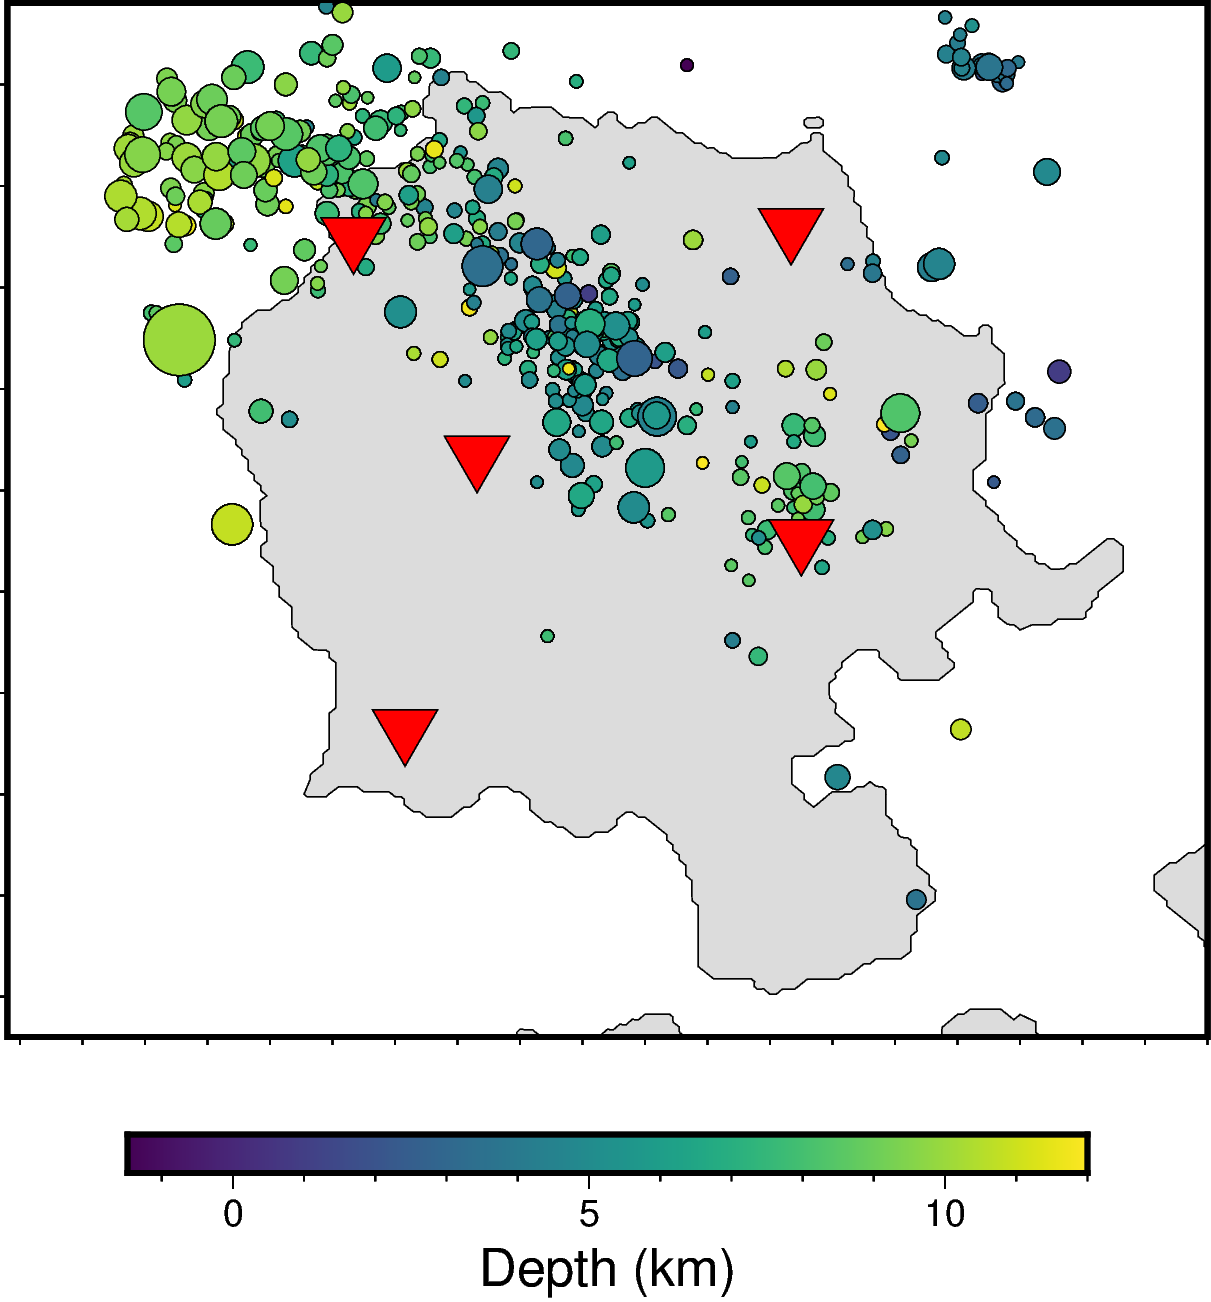

gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


In [7]:
# Set the region for the plot to be slightly larger than the data bounds.
region = ['-176.27/-175.95/51.96/52.13']

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")

fig.basemap(region=region, projection="M4i", frame= 'f')
fig.coast(land="#DCDCDC", water="#FFFFFFF", shorelines=True,frame = 'f')
#fig.grdcontour(grid=grid)
pygmt.makecpt(cmap="viridis", series=[data.depth.min(), data.depth.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    size=0.1 * (2**data.magnitude),
    color=data.depth,
    cmap=True,
    style="cc",
    pen="black",
)
fig.plot(x=sta_locs[:,1], y=sta_locs[:,0], style="i0.25i", color="red", pen="black")
fig.colorbar(frame='af+l"Depth (km)"')
fig.show()

fig.savefig('map_depth.pdf')

gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


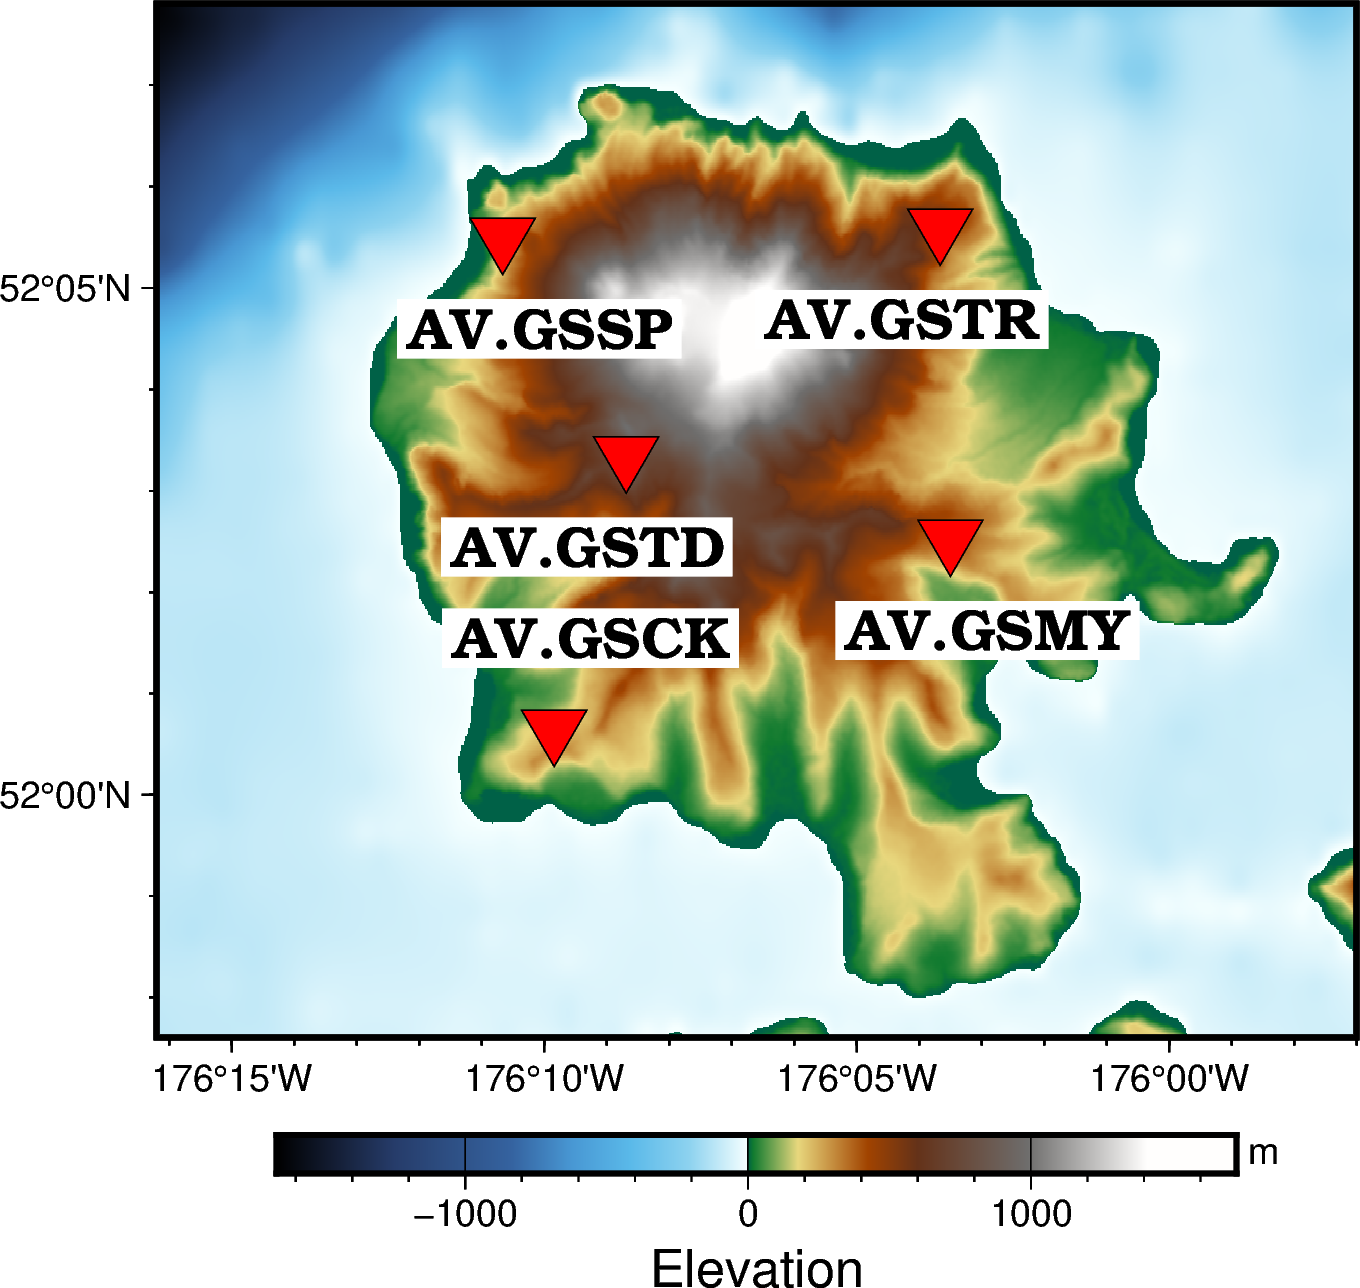

gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


In [13]:
region = ['-176.27/-175.95/51.96/52.13']


sta_list = ['AV.GSCK','AV.GSMY', 'AV.GSSP','AV.GSTD', 'AV.GSTR']

#Set the Region
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="01s", region = ['-176.27/-175.95/51.96/52.13'])
pygmt.config(MAP_FRAME_TYPE="plain")

fig.grdimage(grid=grid, projection='M4i', cmap='geo', frame='af')
# pygmt.config(FORMAT_GEO_MAP="ddd.xx")
fig.plot(x=sta_locs[:,1], y=sta_locs[:,0], style="i0.25i", color="red", pen="black")
fig.colorbar(frame=["agf", "x+lElevation", "y+lm+s24p"])
fig.basemap(frame=["f"])
# fig.show()

# fig = pygmt.Figure()
# fig.basemap(region=region, projection="M15c", frame=True)
# fig.coast(land="lightyellow", water="skyblue", frame='agf')
# fig.plot(x=sta_locs[:,1], y=sta_locs[:,0], style="t0.4c", color="red", pen="black")
fig.text(text=sta_list[0], x=sta_locs[0][1]+0.01, y=sta_locs[0][0]+0.015, fill = 'white', font='14p,Bookman-Demi,black')
fig.text(text=sta_list[1], x=sta_locs[1][1]+0.01, y=sta_locs[1][0]-0.015, fill = 'white', font='14p,Bookman-Demi,black')
fig.text(text=sta_list[2], x=sta_locs[2][1]+0.01, y=sta_locs[2][0]-0.015, fill = 'white', font='14p,Bookman-Demi,black')
fig.text(text=sta_list[3], x=sta_locs[3][1]-0.01, y=sta_locs[3][0]-0.015, fill = 'white', font='14p,Bookman-Demi,black')
fig.text(text=sta_list[4], x=sta_locs[4][1]-0.01, y=sta_locs[4][0]-0.015, fill = 'white', font='14p,Bookman-Demi,black')
fig.show()

fig.savefig('map_sta.pdf')

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -180.13 to -180.133333333
gs: /apps/spack/bell/apps/anaconda/2020.02-py37-gcc-4.8.5-u747gsx/lib/libtiff.so.5: no version information available (required by /lib64/libgs.so.9)


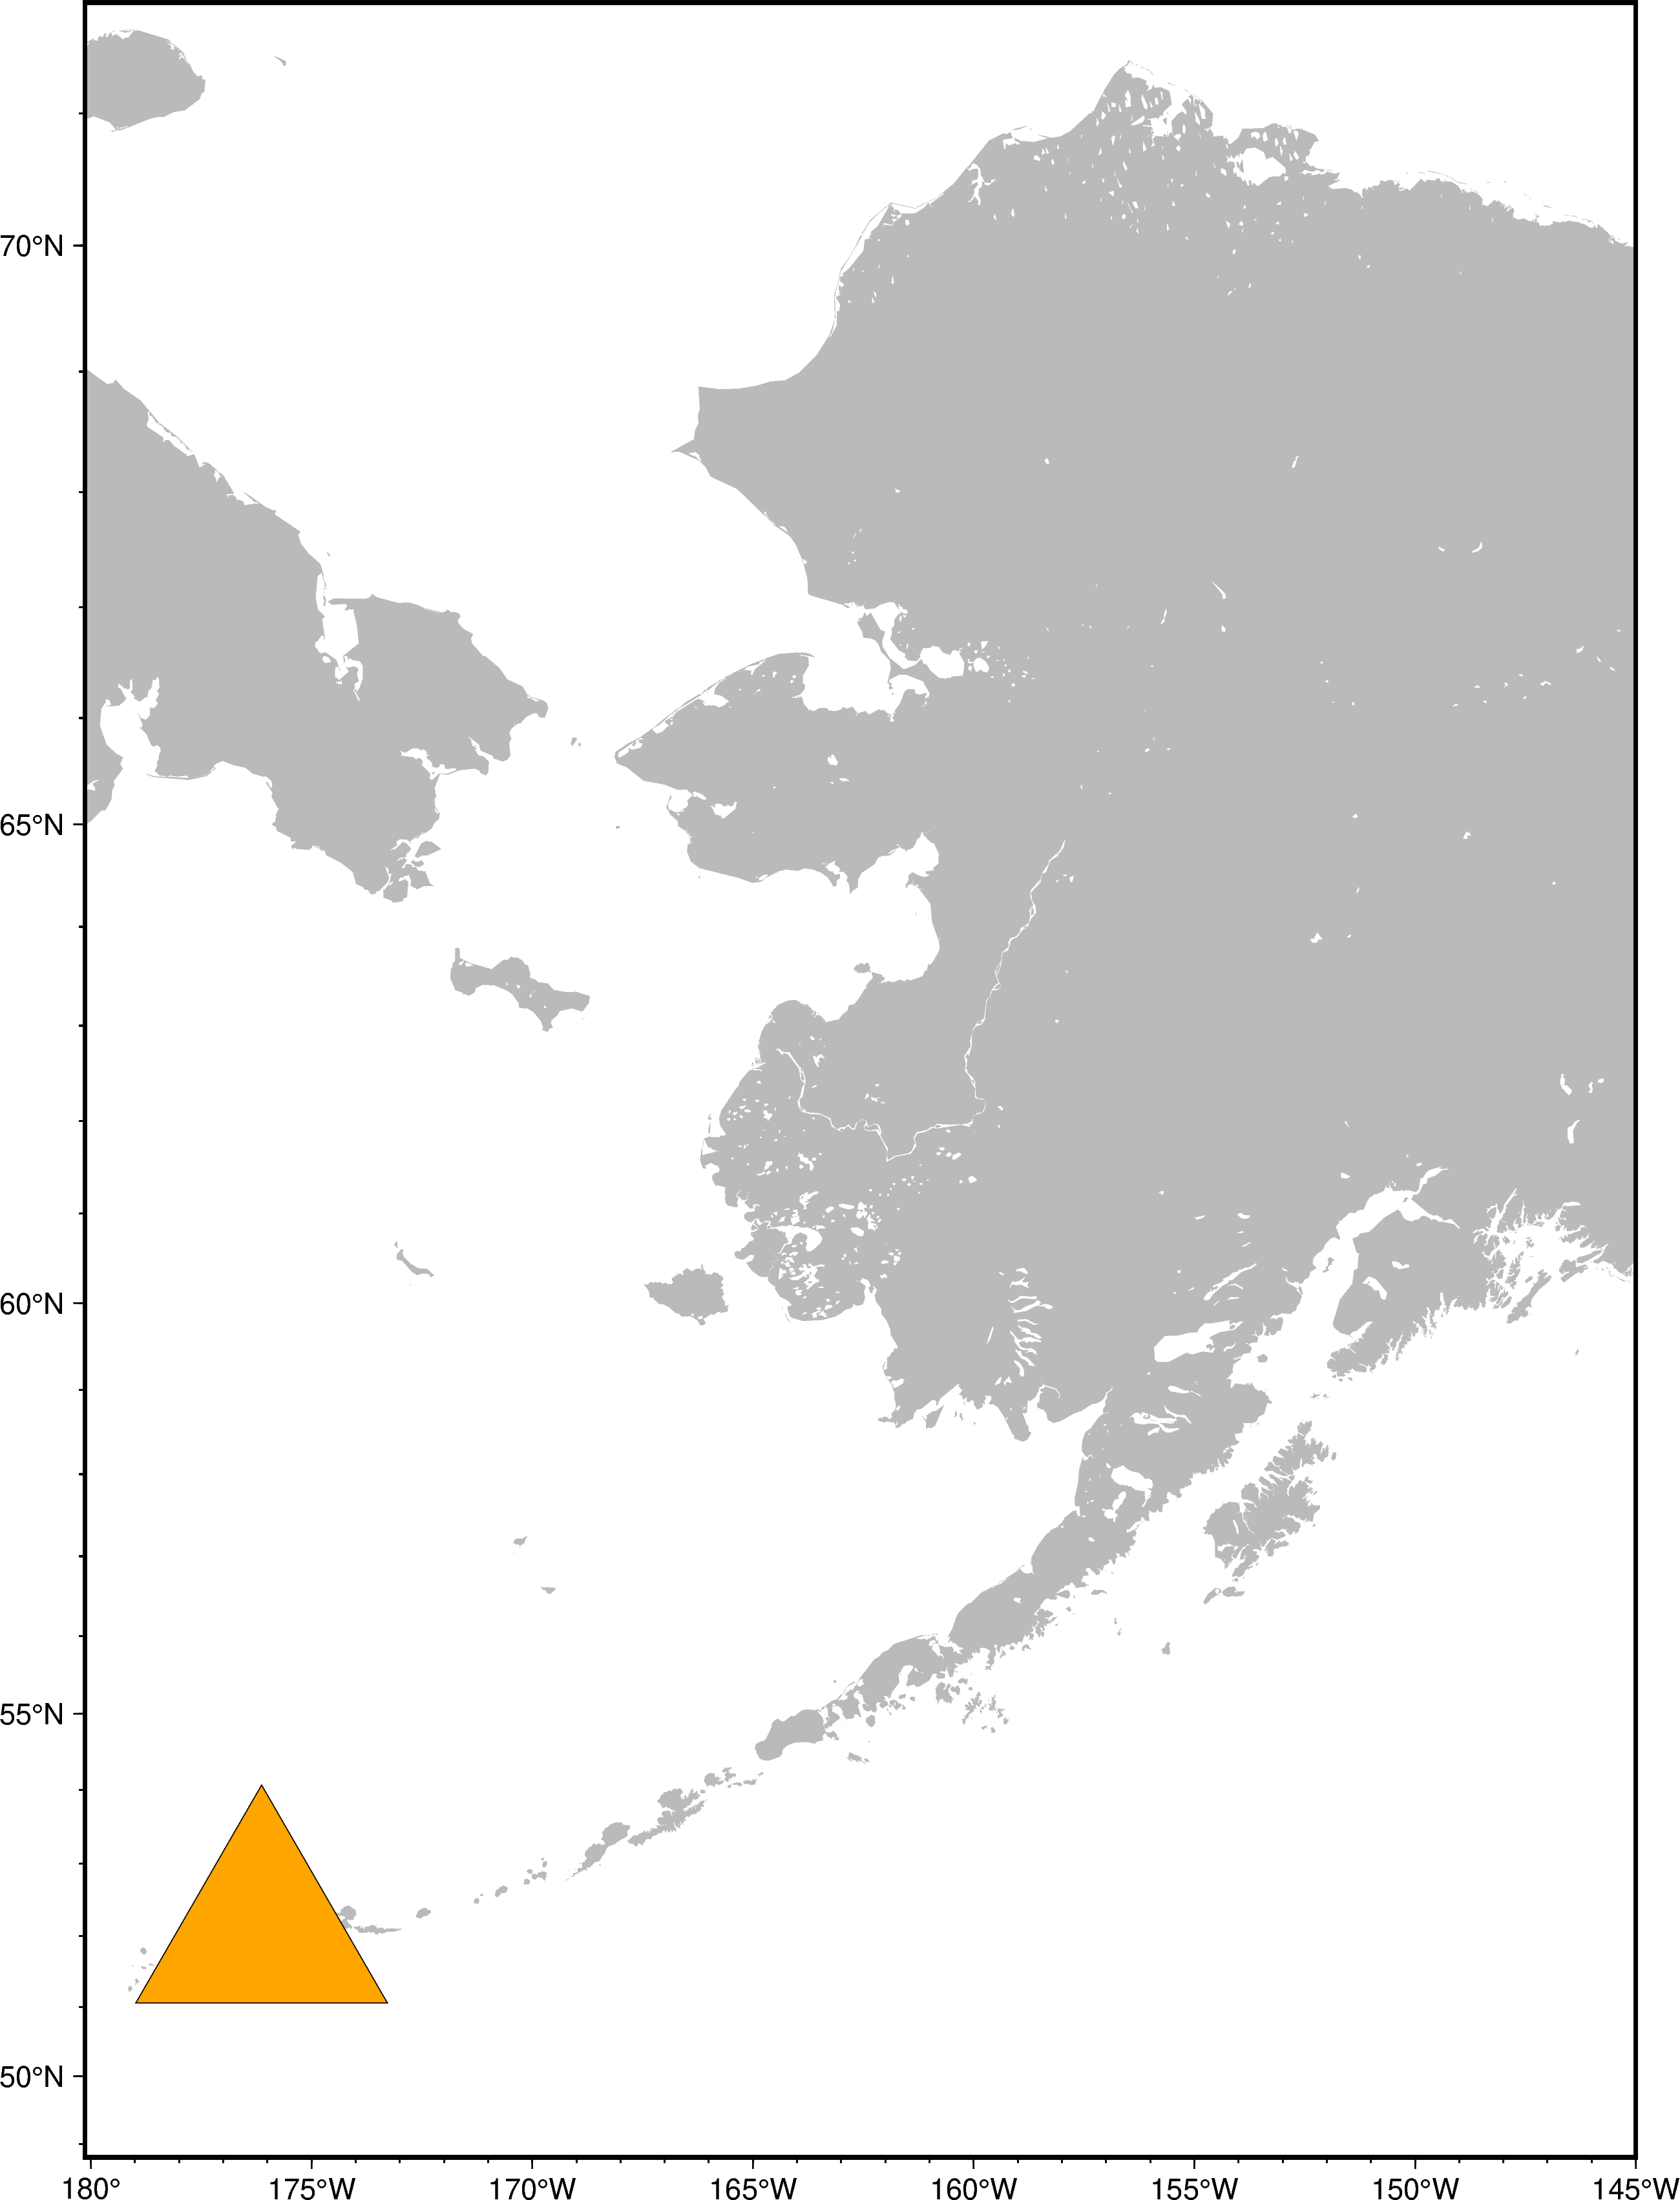

In [14]:
supregion = [-180.13,-145,48.8,71.8]


sta_list = ['AV.GSCK','AV.GSMY', 'AV.GSSP', 'AV.GSTR']

#Set the Region
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="15s", region = supregion)

pygmt.config(MAP_FRAME_TYPE="plain")
# pygmt.config(FORMAT_GEO_MAP="ddd.xx")

fig.grdimage(grid=grid, projection='M8i', frame=True)
fig.coast(land="#BABABA", water="#FFFFFF", frame = 'f')
fig.plot(x=-176.130303, y=52.078594, style="t1.5i", color="orange", pen="black")
# fig.text(text='Great Sitkin', x=-176.130303, y=52.078594+4,\
#          fill='white',font="20p,Bookman-Demi,black")
#fig.colorbar(frame=["agf", "x+lElevation", "y+lm"], position = "JTC+o0c/0.5c+w7i/0.2i+h")
fig.basemap(frame="f")


fig.show()
